# Wikipedia similar articles suggestion

#### Introduction
- <b>Term Frequency–Inverse Document Frequency (TF-IDF):</b> is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

- <b>Term frecuency(TF):</b> Number of ocurrences of the term in the document. When we talk about term frecuency we could mean how ofter does the term , lets say 'car accident,' appear on the article. But we also could mean how often the tag 'car accident' get applied to the article.

- <b>Inverse Document Frecuency (IDF):</b> How few documents contains this term. Intuitively refers how rare for a document to have this term or for a tag to be applied to the article.  →  the higher the number of documents that have this term , the lower the IDF value is. We dont care much about a term if appears everywher, but we care a lot about a term if it is rare.

$$
IDF = log(D / T)
$$

D: Number of documents <br>
T: Number of terms with that document

In other words, tf-idf t,d assigns to term  t  a weight in document  d  that is

1. highest when  t  occurs many times within a small number of documents
2. lower when the term occurs fewer times in a document,or occurs in many documents
3. lowest when the term occurs in virtually all documents.


- <b>k-nearest neighbors algorithm (k-NN):</b> is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it. An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it.

In this notebook, we'll develop a TF-IDF KNN classifer to suggest similar profiles based on wikipedia articles.

## Importing Dependencies

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

## Importing dataset

In [173]:
people = pd.read_csv("people_wiki.csv")
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 he continued to play victorian football league vfl football with the northern bullants carltons v...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from university of chicago in 1973 after studying psychiatry pharmacology and ophthalmology he is a full professor and vicechair of the department of psychiatry at ohsu oregon health science university and holds an md and phd prior to moving to oregon in 1981 lewy was at the national institute of mental health nimh in bethesda maryland working with senior colleague thomas wehr in oregon he has worked closely with robert l sack as of december 2005 he had 94 publications available on pubmed he describes his research as follows my laboratory studies chronobiologic sleep and mood disorders these disorders include winter depression jet lag maladaptation to shift work and certain types of sleep disturbances relying on a very precise assay for plasma melatonin a hormone that has a clearly defined 24hour pattern of secretion biological rhythm disorders can be assessed and their treatment can be monitored current research is focused on developing brigh...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player who has been active in canadas blues scene since 1982 hailing from vancouver he crossed tens of thousands of miles playing club dates and festivals in canada the northwestern united states and germanyover the years he has issued seven cds in 1995 his home is where the harp is won the muddy award for the best nw blues release from the cascade blues association in portland oregon as well that year it was nominated for a canadian juno for the best bluesgospel recording teamed up with graham guest on piano his cd naturally was voted 1 canadian blues album of 2010 by the blind lemon surveybrown tours extensively with his guitarist j arthur edmonds performing their electric mid1950s chicago blues either as a duo or with the full band while he is home he juggles a few combos working many venues big and small he also leads the harpdog brown band which is a gutsy traditional chicago blues band in 2014 they released what it is comprising mainly ...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lower austria austria on 18 january 1942 is an austrian publisher and critic in the fields of science fiction and the fantasticrottensteiner studied journalism english and history at the university of vienna receiving his doctorate in 1969 he served about fifteen years as librarian and editor at the sterreichisches institut fr bauforschung in vienna in addition he produced a number of translations into german of leading sf authors including herbert w franke stanislaw lem philip k dick kobo abe cordwainer smith brian w aldiss and the strugatski brothersin 1973 his new york anthology view from another shore of european science fiction introduced a number of continental authors to th

In [174]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42786 entries, 0 to 42785
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     42786 non-null  object
 1   name    42786 non-null  object
 2   text    42786 non-null  object
dtypes: object(3)
memory usage: 1002.9+ KB


## Explore dataset and check the text it contains

In [175]:
obama = people.loc[people['name']=='David Beckham']
print(obama)

                                               URI           name  \
23386  <http://dbpedia.org/resource/David_Beckham>  David Beckham   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [176]:
counter = CountVectorizer(stop_words='english')
count_matrix = counter.fit_transform(obama.text)
features = counter.get_feature_names()

obama_counter = pd.Series(count_matrix.toarray().flatten(), 
              index = features).sort_values(ascending=False)

print(obama_counter)

beckham      8
league       5
player       5
united       4
played       4
            ..
currently    1
david        1
earners      1
earning      1
years        1
Length: 161, dtype: int64


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### We are gonna plot the most 50 frequent words in Bill's article, without taking under consideration  the stopwords.

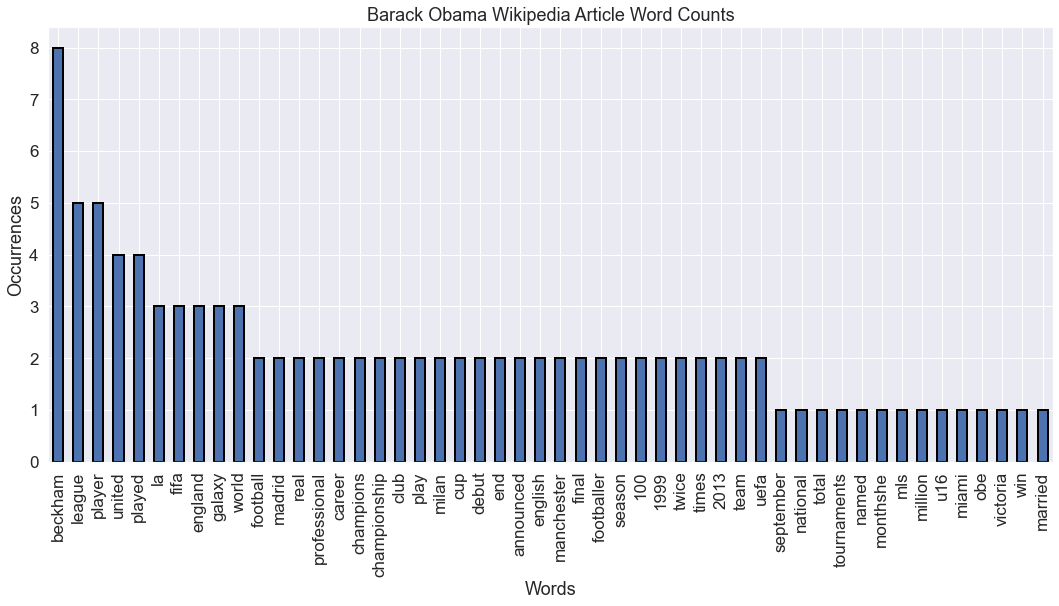

In [177]:
bar_graph = obama_counter[:50].plot(kind='bar', figsize=(18,8), alpha=1, fontsize=17, rot=90,edgecolor='black', linewidth=2,
            title='Barack Obama Wikipedia Article Word Counts')
bar_graph.set_xlabel('Words')
bar_graph.set_ylabel('Occurrences')
bar_graph.title.set_size(18)

## Compute TF-IDF for the corpus

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'TF-IDF')

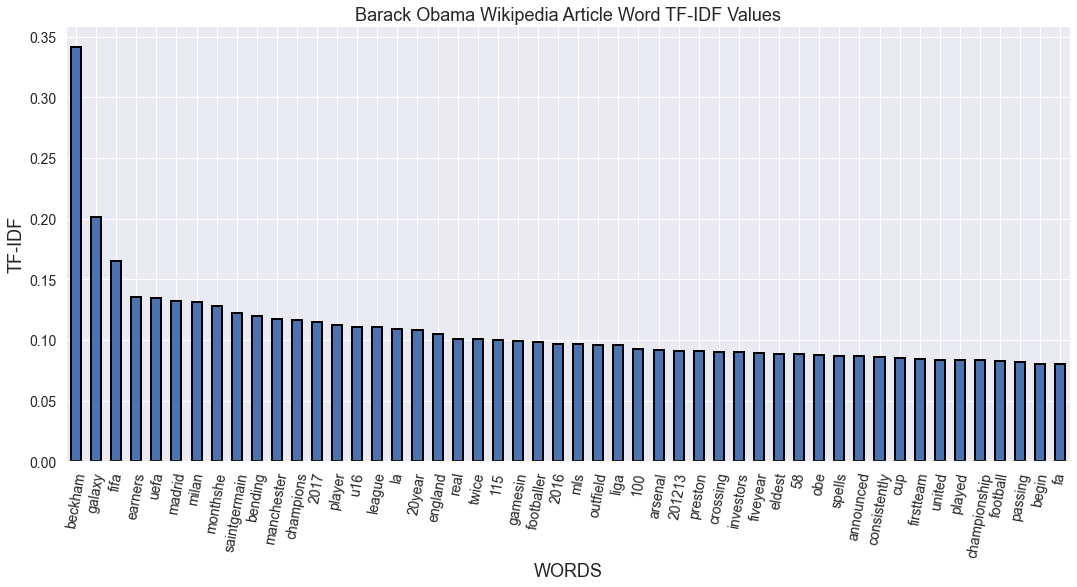

In [178]:
name = 'David Beckham'
# TfidfVectorizer: Converts a collection of raw documents to a matrix of TF-IDF features.
# min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
# max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.
# Apply this vectorizer to the full dataset to create normalized vectors
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf = True, stop_words = 'english')

# tfidf_vectorizer.fit: Learn vocabulary and idf from training set.
tfidf_matrix = tfidf_vectorizer.fit_transform(people.text.values)

# tfidf_vectorizer.get_feature_names(): Array mapping from feature integer indices to feature name
features = tfidf_vectorizer.get_feature_names()

# tfidf_vectorizer.get_feature_names(): Array mapping from feature integer indices to feature name
# Get the row that belongs to Bill Obama
row = people[people.name==name].index.tolist()[0]

# Create a series from the sparse matrix
obama_matrix = pd.Series(tfidf_matrix.getrow(row).toarray().flatten(),index = features).sort_values(ascending=False)
tf_idf_plot = obama_matrix[:50].plot(kind='bar', title='Barack Obama Wikipedia Article Word TF-IDF Values',
            figsize=(18,8), alpha=1, fontsize=14, rot=80,edgecolor='black', linewidth=2 )
tf_idf_plot.title.set_size(18)
tf_idf_plot.set_xlabel('WORDS')
tf_idf_plot.set_ylabel('TF-IDF')


## Manually compute distance between two people

In [183]:
from scipy.spatial import distance

biden = people.loc[people['name']=='Joe Biden']
ancelotti = people.loc[people['name']=='Carlo Ancelotti']

biden_matrix = tfidf_matrix.getrow(biden.index.tolist()[0]).toarray()
ancelotti_matrix = tfidf_matrix.getrow(ancelotti.index.tolist()[0]).toarray()

print(distance.cosine(biden_matrix, obama_matrix))
print(distance.cosine(ancelotti_matrix, obama_matrix))


1.0
0.996425402682837


## Build a KNN model for document retrieval using tfidf

In [180]:
# Number of neighbors to use by default is 5 that's why we dont give to knn_neighbours any parameter
# weights: where  you detail if all points in each neighborhood are weighted equally or not.
# algorithm:‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute
# By default the distance that the algorithm uses is Mink
knn_neighbours = NearestNeighbors(n_neighbors=20)
knn_neighbours.fit(tfidf_matrix)

NearestNeighbors(n_neighbors=20)

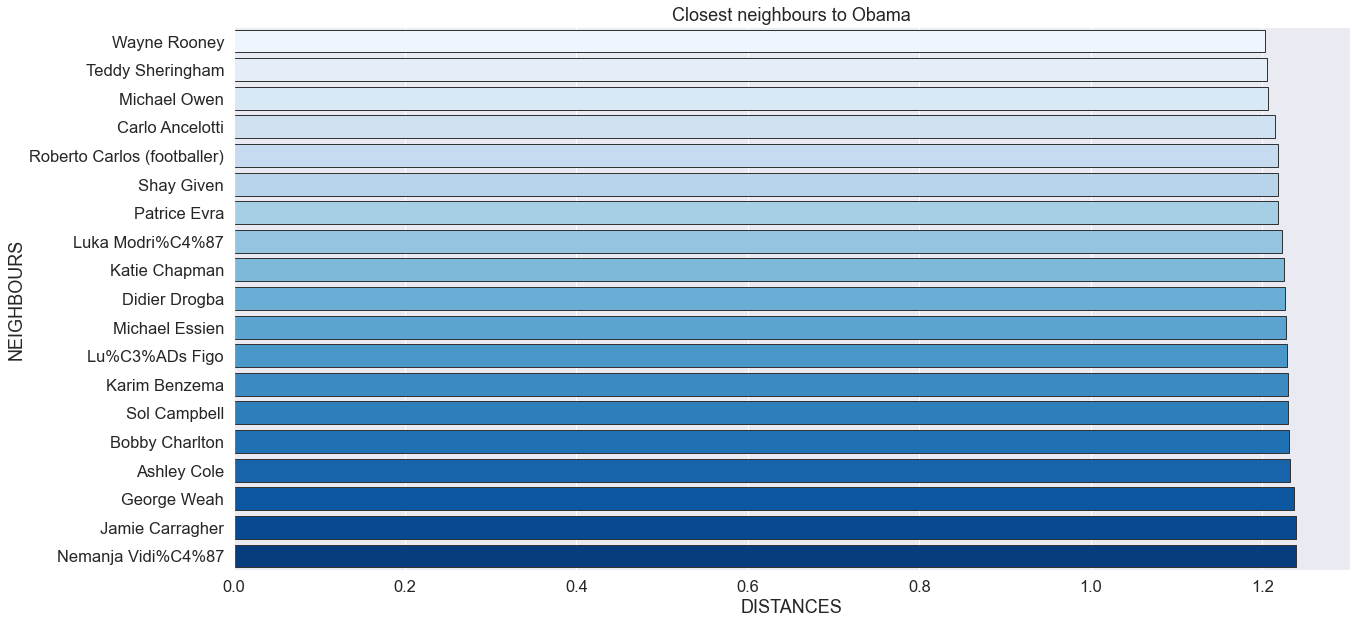

In [181]:
# closest_friends returns a list of lists. Where the first one belongs to the distances and the second one to the rows
closest_friends = knn_neighbours.kneighbors(tfidf_matrix.getrow(row), return_distance=True)
names_index = closest_friends[1][0]
names = [people.iloc[row]['name'] for row in names_index]
distances = closest_friends[0][0]

# If it is the case, we delete the name that has distance zero.
if distances[0]==0.0: distances,names = np.delete(distances,0),np.delete(names,0) 
data = pd.DataFrame({'Distances': distances,'Neighbours':names })
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
closest_neighbours_to_obama = sns.barplot(x='Distances', y="Neighbours", data= data ,linewidth=1,edgecolor=".2",palette="Blues",saturation=1)
closest_neighbours_to_obama.set_title('Closest neighbours to Obama')
closest_neighbours_to_obama.set(xlabel='DISTANCES', ylabel='NEIGHBOURS')
plt.show()